### Notes + Basic Knowledge
https://docs.google.com/document/d/1WIIexIAGeS29suqTYGueSvpS_jN_Wq9HMk7K69VVfCo/edit?usp=sharing

### OpenNeuro Dataset
https://openneuro.org/datasets/ds002748/versions/1.0.5

The dataset is composed of resting state (with closed eyes) MRI's and fMRI's of 51 subjects with mild depression and 21 healthy controls. Each fMRI had a reptition time (TR) of 2.5 seconds with 100 dynamic scans and 25 slices for each.

Citation: Bezmaternykh D.D., Melnikov M.Y., Savelov A.A. et al. Brain Networks Connectivity in Mild to Moderate Depression: Resting State fMRI Study with Implications to Nonpharmacological Treatment. Neural Plasticity, 2021. V. 2021. № 8846097. PP. 1-15. DOI: 10.1155/2021/8846097


### Exploratory Data Analysis of Dataset (Numerical Aspect)

In [26]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_excel('depression_mri_data.xlsx')
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [14]:
pd.set_option('display.max_columns', None)
df.head()

,participant_id,age,gender,group,IQ_Raven,ICD-10,MADRS,Zung_SDS,BDI,HADS-anx,HADS-depr,MC-SDS,TAS-26,ECR-avoid,ECR-anx,RRS-sum,RRS-reflection,RRS-brooding,RRS-depr,Edinburgh
0,sub-01,39,m,depr,113.0,F32.0,NaN,43.0,17.0,NaN,NaN,9.0,81.0,66.0,60.0,53.0,12.0,14.0,27.0,NaN
1,sub-02,50,m,depr,80.0,F32.0,NaN,47.0,10.0,NaN,NaN,15.0,54.0,62.0,78.0,59.0,14.0,12.0,33.0,NaN
2,sub-03,47,f,depr,87.0,F32.0,NaN,44.0,19.0,NaN,NaN,15.0,80.0,42.0,54.0,47.0,11.0,9.0,27.0,NaN
3,sub-04,32,f,depr,100.0,F32.0,NaN,34.0,6.0,NaN,NaN,10.0,71.0,42.0,39.0,37.0,9.0,9.0,19.0,NaN
4,sub-05,26,f,depr,104.0,F32.0,NaN,48.0,17.0,NaN,NaN,10.0,65.0,52.0,68.0,61.0,14.0,13.0,34.0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  72 non-null     object 
 1   age             72 non-null     int64  
 2   gender          72 non-null     object 
 3   group           72 non-null     object 
 4   IQ_Raven        68 non-null     float64
 5   ICD-10          50 non-null     object 
 6   MADRS           27 non-null     float64
 7   Zung_SDS        64 non-null     float64
 8   BDI             65 non-null     float64
 9   HADS-anx        27 non-null     float64
 10  HADS-depr       27 non-null     float64
 11  MC-SDS          65 non-null     float64
 12  TAS-26          64 non-null     float64
 13  ECR-avoid       64 non-null     float64
 14  ECR-anx         64 non-null     float64
 15  RRS-sum         63 non-null     float64
 16  RRS-reflection  63 non-null     float64
 17  RRS-brooding    63 non-null     float

In [15]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0] #prints variables with missing values
print (vars_with_na)

['IQ_Raven', 'ICD-10', 'MADRS', 'Zung_SDS', 'BDI', 'HADS-anx', 'HADS-depr', 'MC-SDS', 'TAS-26', 'ECR-avoid', 'ECR-anx', 'RRS-sum', 'RRS-reflection', 'RRS-brooding', 'RRS-depr', 'Edinburgh']


Notably, there are quite a few variables with missing values; however, the target feature, "group," along with other improtant demographic vairables are not listed among those with missing values. This means that when determing the genearl distribution of important variables in the data (when looking at it numerically), there will not be any variables that greatly affect my ability to determine a trend or relationship.

In [16]:
df.describe()

,age,IQ_Raven,MADRS,Zung_SDS,BDI,HADS-anx,HADS-depr,MC-SDS,TAS-26,ECR-avoid,ECR-anx,RRS-sum,RRS-reflection,RRS-brooding,RRS-depr,Edinburgh
count,72.000000,68.000000,27.000000,64.000000,65.000000,27.000000,27.000000,65.000000,64.000000,64.00000,64.000000,63.000000,63.000000,63.000000,63.000000,28.000000
mean,33.083333,104.323529,26.666667,42.671875,16.415385,11.407407,8.111111,11.600000,64.296875,45.12500,56.921875,51.079365,11.507937,11.126984,28.444444,43.178571
std,8.730310,15.020823,4.385290,9.179091,11.564888,3.973559,3.734798,2.220642,12.397746,14.52256,17.899459,12.903240,3.247197,3.055888,7.508657,54.852701
min,19.000000,68.000000,15.000000,26.000000,0.000000,5.000000,1.000000,6.000000,38.000000,18.00000,21.000000,25.000000,5.000000,5.000000,14.000000,-86.000000
25%,27.000000,92.750000,23.500000,35.000000,6.000000,9.000000,5.500000,10.000000,55.000000,34.00000,41.000000,43.000000,10.000000,9.000000,22.500000,12.750000
50%,31.000000,104.000000,29.000000,44.000000,15.000000,11.000000,8.000000,11.000000,64.500000,43.00000,59.000000,52.000000,12.000000,11.000000,29.000000,60.000000
75%,39.250000,116.500000,30.000000,50.000000,24.000000,14.000000,11.000000,13.000000,73.000000,54.25000,69.250000,61.000000,14.000000,13.000000,34.000000,82.750000
max,55.000000,130.000000,30.000000,59.000000,39.000000,21.000000,14.000000,16.000000,87.000000,80.00000,98.000000,83.000000,20.000000,18.000000,45.000000,100.000000


It should be noted that the average age of the participants is around 33, which could have an affect on the results since there is research showing that there are differences in depression between different age groups.

In [24]:
def draw_histograms(df, variables, n_rows, n_cols, dtype, uni_bivariate):
    fig = plt.figure(figsize = (5 * n_cols, 5 * n_rows), dpi = 200)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        if dtype == "Cat":
            if uni_bivariate == 1:
#               df[var_name].value_counts().plot(kind = "bar", ax=ax)
                sns.countplot(data = df, x = var_name, ax = ax)
            else:
                sns.countplot(data = df, x = var_name, hue = "group", ax = ax)
            ax.set_title(var_name+" Frequency")
        else:
            if uni_bivariate == 1:
#               df[var_name].hist(bins=15, ax=ax)
                sns.histplot(data = df, x = var_name, bins = 15, ax = ax)
            else:
                sns.histplot(data = df, x = var_name, bins = 15, hue = "group", ax = ax)
            ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

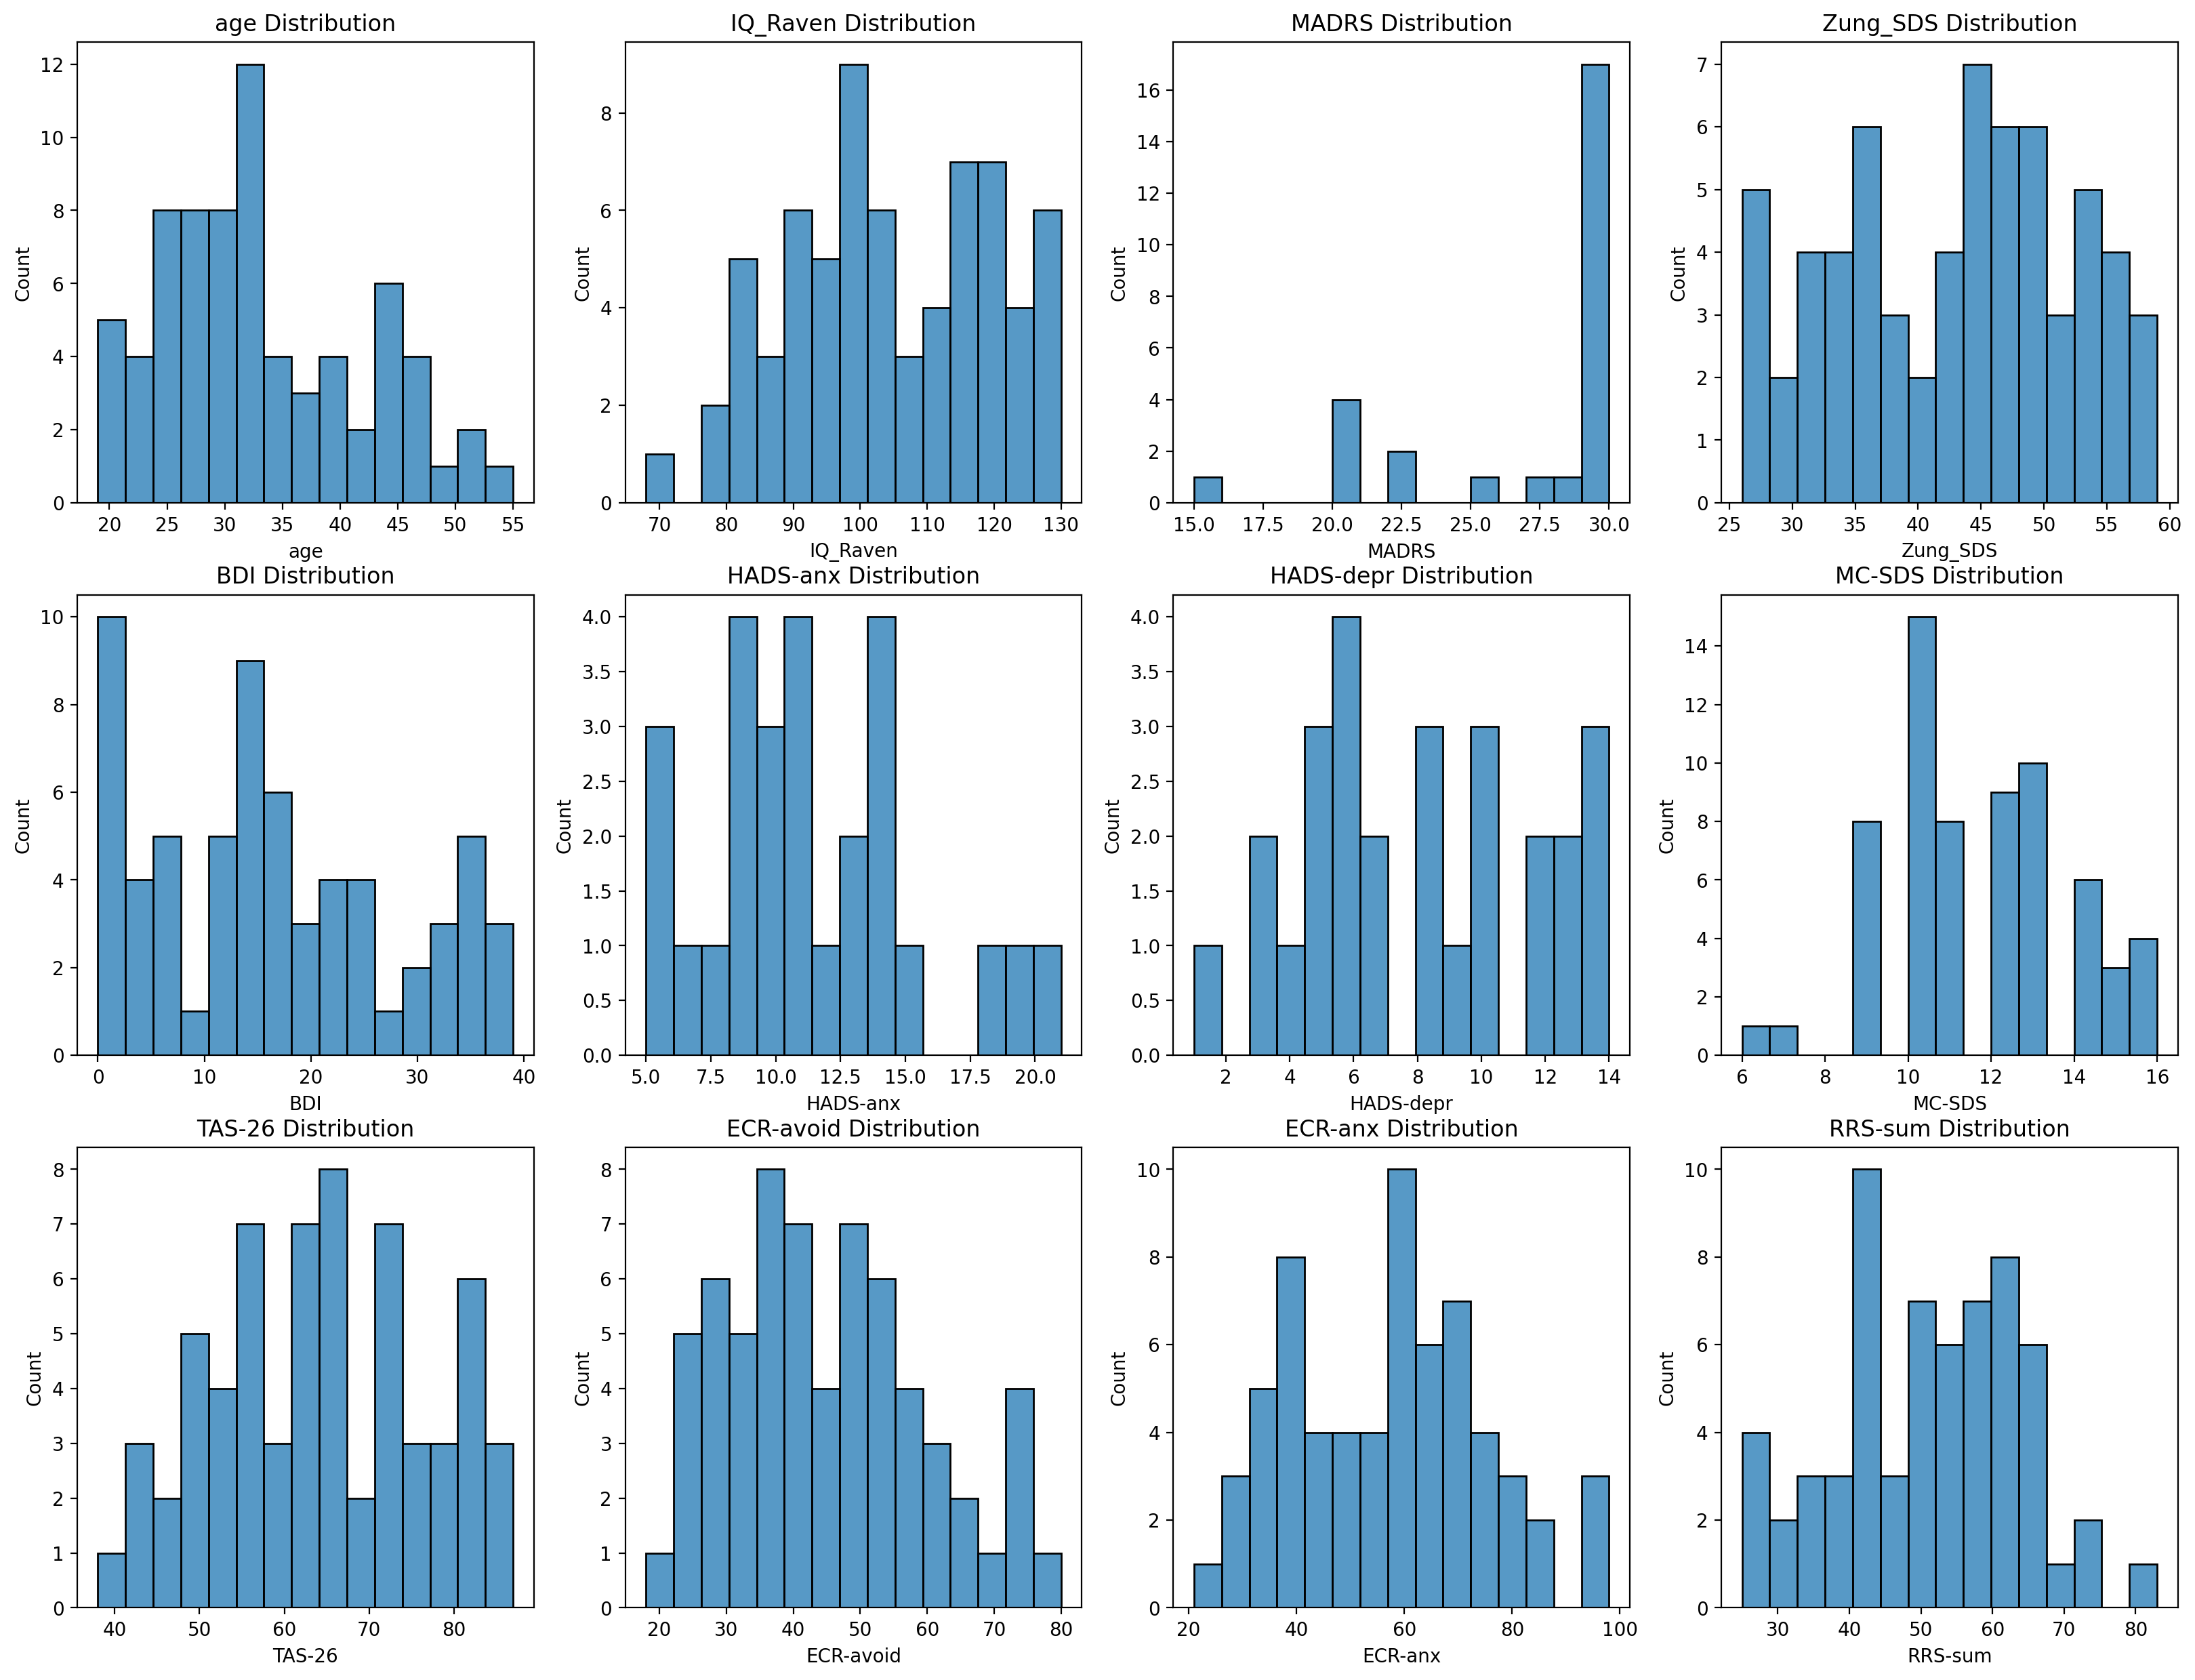

In [27]:
%%capture --no-display
draw_histograms(df, num_cols, 3, 4, dtype = "Num", uni_bivariate = 1)

### MRI Preprocessing

#### Using Data Processing Assistant for Resting-State fMRI (DPABI)

##### Segmentation

##### fMRI Noise

fMRI's use the 

#### 3 Primary Methods
##### Regional Homogeneity (ReHo)
This method involves a voxel-based measure of similarity/synchronization between time series of given voxel and its nearest neighbors. Similarity is measured using the metric of Kendall's coefficient of concordance (KCC). A benefit of using ReHo is that it doesn't require an *a priori* definition for ROI's, and can provide information about the local/regional activity of regions throughout the brain. 

Source: https://fcp-indi.github.io/docs/latest/user/reho#:~:text=Regional%20Homogeneity%20(ReHo)%20is%20a,et%20al.%2C%202004)

Source: https://www.researchgate.net/figure/KCC-for-different-R-fMRI-metrics-Spatial-distribution-of-voxel-wise-Kendalls_fig7_281780214

##### Amplitude of Low-Frequency Fluctuations (ALFF)
This is a quanitification methods for the amplitude of the low frequency oscillations (LFOs). 
Both are primarily sensitive to gray matter,w ith ALFF being more prone to noise from physiological sources (ventricles and large blood vessels)
ALFF is more reliable in comparison to fALFF, meaning it might be more useful when it comes to showing differences between groups and individuals, which might be particularly beneficial for this project.

Source: https://fcp-indi.github.io/docs/latest/user/alff.html?highlight=falff


##### Fractional Amplitude of Low-Frequency Fluctuations

##### Resulting Folders
The folders are named with the following abbreviation key: 
<img src="DPABI_Abbreviations.png"> 

- Initial Folders included T1Raw and FunRaw
- FunRaw &rarr; FunImg: system converted the DICOM files into NIfTI files for algorithmic use
- FunImgA: Slice Timing
- FunImgAR: Slice Timing, Realign
- FunImgARC: Slice Timing, Realign, Covariates Removed
- FunImgARCovs: Slice Timing, Realign, Covariates?
- FunImgARCW: Slice Timing, Realign, Covariates Removed, Normalize
- FunImgARCWS: Slice Timing, Realign, Covariates Removed, Normalize, Smooth
- FunImgARglobal: Slice Timing, Realign,
- FunImgARglobalC: Slice Timing, Realign, Covariates Removed
- FunImgARglobalCovs: Slice Timing, Realign, Covariates?
- FunImgARglobalCW: Covariates Removed, Normalize
- FunImgARglobalCWS: Covariates Removed, Normalize, Smooth
- Masks???
- PicturesForChkNormalization
- RealignParameter: 
- Results: shows final results
- T1ImgBet: Skull Stripping
- T1ImgCoreg: Coregistered to functional imaging
- T1ImgNewSegment: segmentation

#### MRIcron Visualization Tool
Below is the structural MRI image for the first subject.
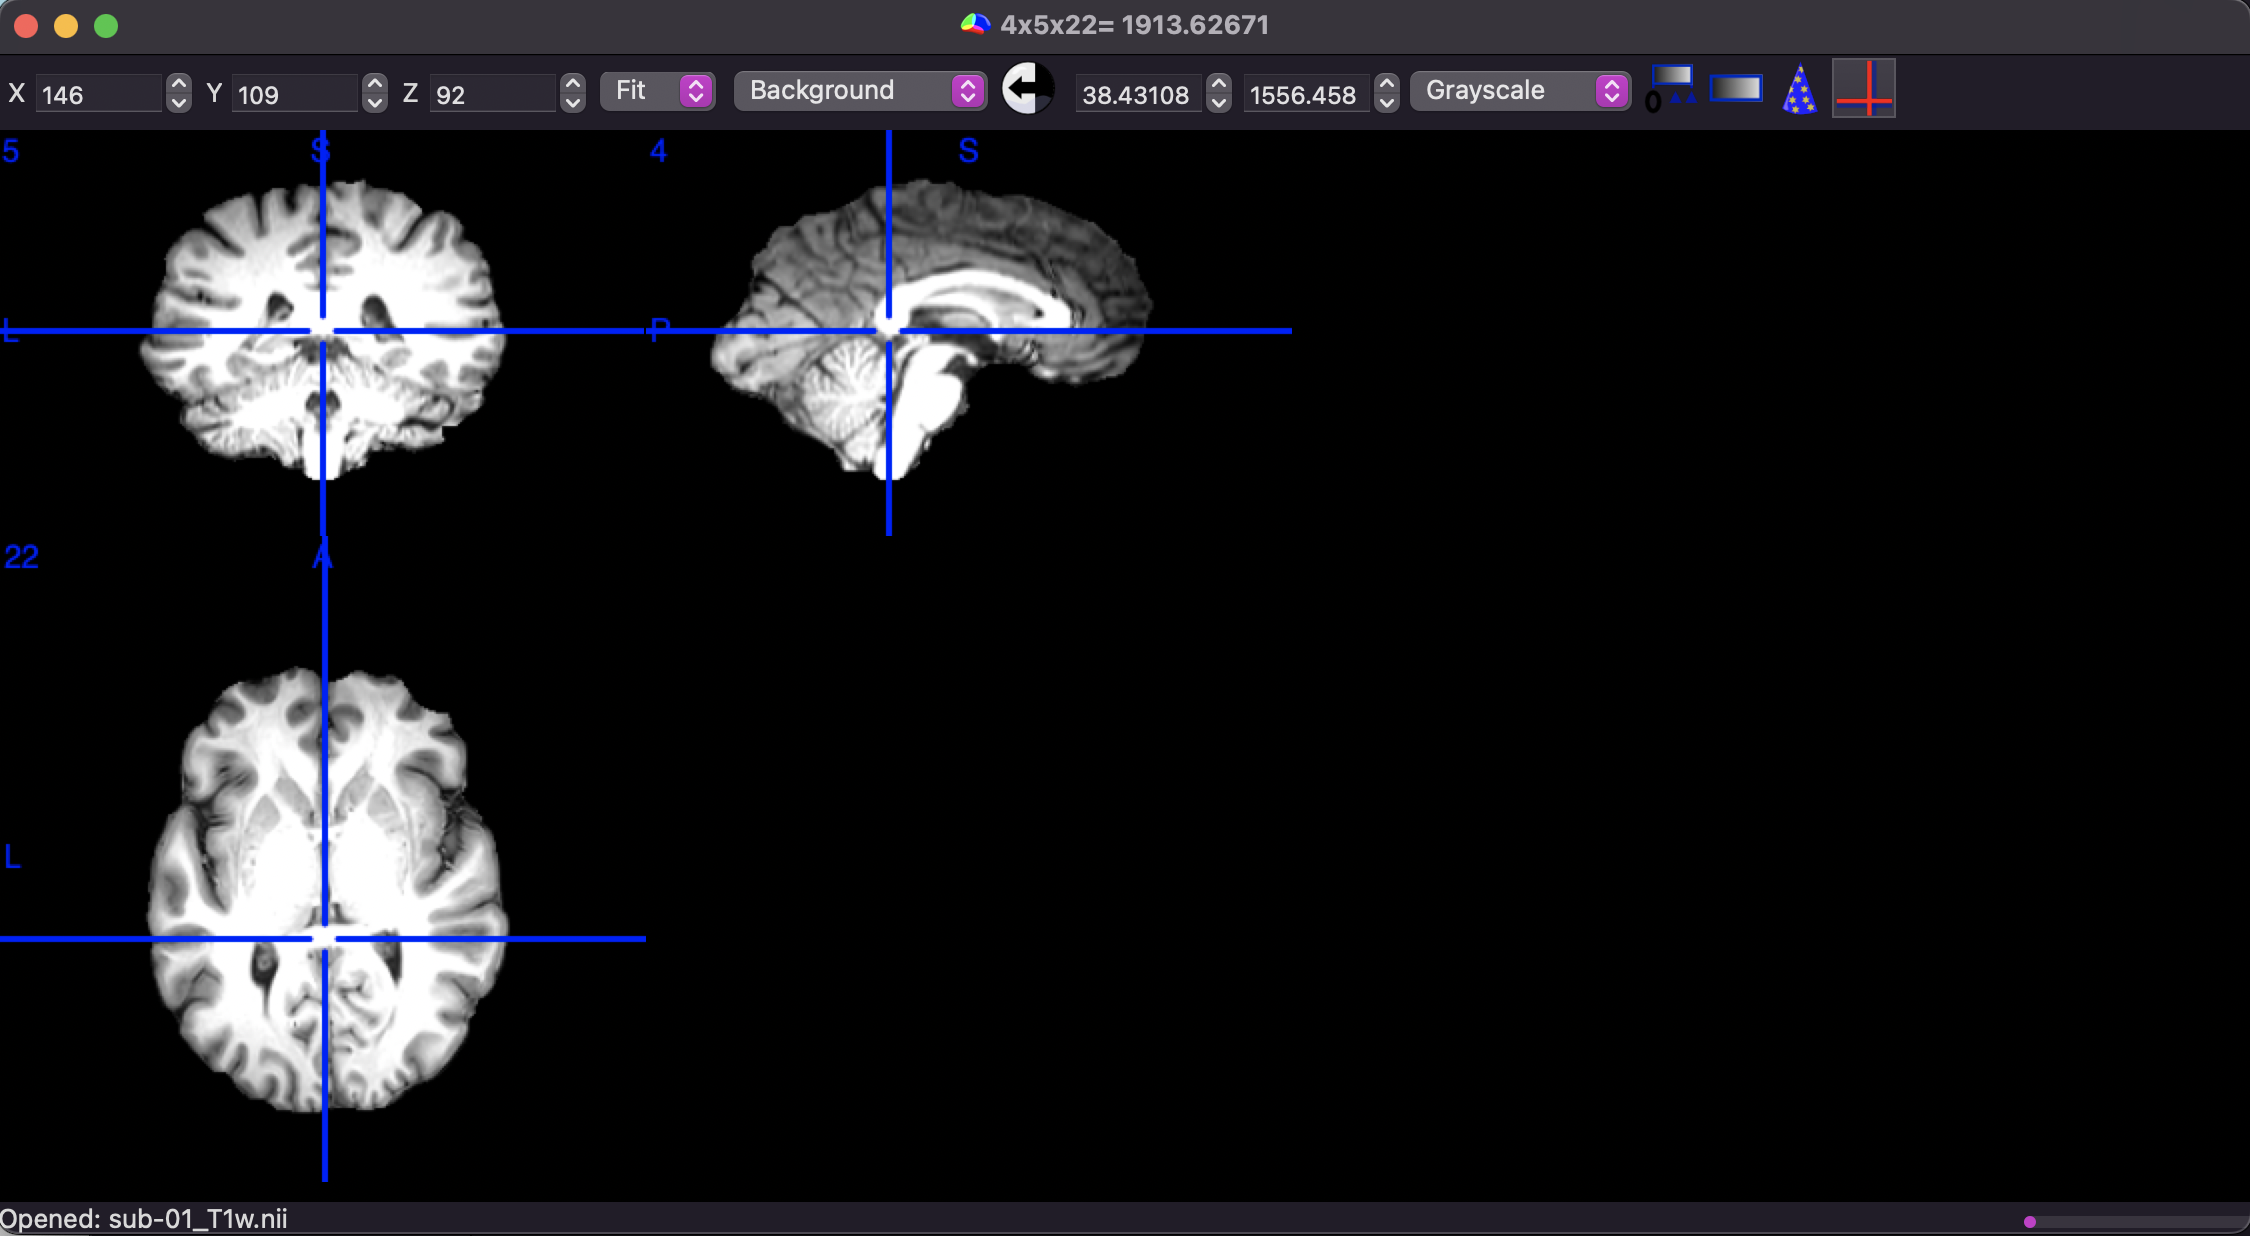


### DPARSF Pipline 
- DPARSF is built off functions in Statistical Parametric Mapping (SPM) and Resting-State fMRI Data Analysis Toolkit (REST)
- DPARSF helpe to preprocess (slice timing, realign, normalize, smooth)
- provides results for functional connectivity (FC), regional homogeneity (ReHo), amplitude of low-frequency fluctuation (ALFF), and fractional amplitude of low-frquency fluctuation (fALFF) &rarr; calculated using REST  toolbox
- 

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2889691/

In [ ]:
#Importing Necessary Packages
import os, sys, cv2, random
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #CUDA_VISIBLE_DEVICES is an environment variable used by NVIDIA's CUDA framework - specifies to use GPU 0 (first GPU on computer)

import torch #contains data structures for multi-dimensional tensors and mathematical operations
import numpy as np #scientific computing package
import torch.nn as nn #neural networking
import torch.backends.cudnn as cudnn #NVIDIA CUDA Deep Neural Network - a GPU accelerateed library of primitives for DNNs 
from torchvision import transforms #helps with transformations

from models.BrainFormer import BrainFormer #Brainformers 
''' #Not Needed
#from models.resnet3D import resnet3D
#from models.MLP_mixer3D import MLPMixer3D
#from models.ViT3D import resnet3D
'''
from utils.dataset import fMRIdataset, fMRIdataset_stride  
from utils.logger import Logger
from utils.evaluation import compute_performance, compute_performance_class
import pandas as pd
''' #Not Needed
#from sklearn.model_selection import train_test_split
'''

cudnn.benchmark = False        
cudnn.deterministic = True

seed = 2
torch.manual_seed(seed)    
torch.cuda.manual_seed(seed)       
torch.cuda.manual_seed_all(seed)   

random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)


sys.stdout = Logger('./log_train.txt')
device_id = torch.device('cuda', 0)
###########   HYPER   ###########
epochs = 30
step_size = 25
base_lr = 3e-5 #tried larger learning rate but did not improve performance
gamma = 0.7

batch_size = 64
class_num = 2
##########   DATASET   ###########
img_dir = '/home/ljn/disk1/Medical_data/ADNI_series/'
train_dataset = fMRIdataset_stride(
    dataset_dir=img_dir, 
    ann_file='list_2class/list_ADNI_train.txt', 
    size=(64, 64, 48),
    stride=1)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = batch_size, shuffle = True, num_workers = 8, drop_last=True)

val_dataset = fMRIdataset(
    dataset_dir=img_dir, 
    ann_file='list_2class/list_ADNI_val.txt', 
    size=(64, 64, 48))
val_loader = torch.utils.data.DataLoader(dataset = val_dataset, 
                                         batch_size = 1, shuffle = False, num_workers = 4)

test_dataset = fMRIdataset(
    dataset_dir=img_dir, 
    ann_file='list_2class/list_ADNI_test.txt',  
    size=(64, 64, 48))
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                          batch_size = 8, shuffle = False, num_workers = 4)

###########   MODEL   ###########
#model = resnet3D(depth=18, num_classes=class_num,
    #pretrained='../resnet18-5c106cde.pth')
#model = ViT(dim=256, image_size=(64,64,48), patch_size=8, num_classes=class_num,
            #depth=6, heads=8, dim_head=64, mlp_dim=128)
model, param = BrainFormer(depth=18, num_classes=class_num,
                           pretrained='../resnet18-5c106cde.pth')

model.to(device_id)
print('model load')

criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=base_lr)
optimizer = torch.optim.Adam(param, lr=base_lr)

###########   TRAIN   ###########
for epoch in range(epochs):
    lr = base_lr * (gamma ** (epoch // step_size))
    for g in optimizer.param_groups:
        g['lr'] = lr * g.get('lr_mult', 1)	

    print('-' * 10)
    print('epoch {}'.format(epoch + 1))

    running_loss, running_acc = 0.0, 0.0
    model.train()
    for i, data in enumerate(train_loader, 1):
        #print()
        images, label, idx = data
        images = images.to(device_id)
        label = label.to(device_id)
        #print(images.size())
        out = model(images)[0]

        loss = criterion(out, label)
        running_loss += loss.item() * label.size(0)

        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        running_acc += num_correct.item()


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print('[%d/%d] iter: %d/%d. lr:%f . Loss: %.3f, Acc:%.3f'%(epoch+1, epochs, i, len(train_loader), lr, running_loss/(batch_size*i), running_acc/(batch_size*i)))
        #break
        
    print('start test on val set')
    model.eval()
    val_loss, preds = 0.0, []
    for i, data in enumerate(val_loader, 1):
        with torch.no_grad():
            images, label, idx = data
            images = images.to(device_id)
            label = label.to(device_id)
            
            out = model(images)[0]
            _, pred = torch.max(out, 1)
            preds.append(pred)

            loss = criterion(out, label)
            val_loss += loss.item() * label.size(0)

    val_loss = val_loss/len(val_dataset)
    preds = torch.cat(preds).cpu()
    labels = torch.tensor(val_dataset.label_list)
    
    accuracy, precisions, recall, F1_score = compute_performance(preds, labels, class_num=class_num)
    
    print('Val loss: %.3f, Acc: %.3f, precision: %.3f, recall: %.3f, F1_score: %.3f'%(val_loss, accuracy, precisions, recall, F1_score))
    print('Finish {} epoch'.format(epoch+1))
    torch.save(model.state_dict(), 'weight/Vit_medical_%03d.pth'%(epoch))
    #break

print('start test on test set')
model.eval()
test_loss, preds = 0.0, []
for i, data in enumerate(test_loader, 1):
    
    with torch.no_grad():
        
        images, label, idx = data
        images = images.to(device_id)
        label = label.to(device_id)
        
        out = model(images)[0]
        _, pred = torch.max(out, 1)
        preds.append(pred)
        
        loss = criterion(out, label)
        test_loss += loss.item() * label.size(0)

test_loss = test_loss/len(test_dataset)
preds = torch.cat(preds).cpu()
labels = torch.tensor(test_dataset.label_list)

accuracy, precisions, recall, F1_score = compute_performance(preds, labels, class_num=class_num)	
print('Test loss: %.3f, Acc: %.3f, precision: %.3f, recall: %.3f, F1_score: %.3f'%(test_loss, accuracy, precisions, recall, F1_score))

overall_acc, precisions, recalls, F1_scores, accs = compute_performance_class(preds, labels, class_num=class_num)	
print('overall_acc:', overall_acc)
print('accs:', accs)
print('precisions:', precisions)
print('recalls:', recalls)
print('F1_scores:', F1_scores)

In [ ]:
#Sorting Code for Harmonization Dataset

import os 
import shutil

structural_src_paths = []
functional_src_paths = []
structural_dst_paths = []
functional_dst_paths = []
For each patient: #os.path.listdir(folder)
	copy path to structural
	copy path to functional
	create your dst path for structural
	create your dst path for functional

# copy files structural
For src, dst in zip(structural_src_paths, structural_dst_paths):
	shutil.copy(src, dst)

# copy files functional
For src, dst in zip(functional_src_paths, functional_dst_paths):
	shutil.copy(src, dst)
    
    
    
